<div style="text-align: center">
<h1>Redundant Planar Manipulators</h1>
Arjun Bhasin 
</div>


## Introduction

If a system has more number of degrees of freedom than are necessary to perform a certain given task, it is called redundant, where the degrees of freedom (DoF) of a system is the minimum number of independent variables required to completely define the system.

A redundant manipulator like the human arm, is more dexterous, versatile, can carry out complex manoeuvres of avoiding obstacles and singularities, and operate well within its structural limitations. Redundancy also makes a system more reliable, as in the unfortunate case of joint failure, it can still perform the primary task. 
On the downside, a redundant system is more expensive, requires more sophisticated control and their structure is more complex and heavier.

In this article we will study the Redundancy Analysis and Control of a 4 DoF Planar Manipulator Arm. Such an arm is also referred to as 4R as it has 4 Revolute Joints. We will use 4DoF and 4R interchangeably throughout the article.

Let us start by building the Kinematic Model of the 4R Manipulator. Subsequently we will build the Instantaneous Kinematic Model, the Jacobian Matrix and see how we can control the manipulator leveraging its redundancy.

## Kinematic Model

Let us denote the end-effector position of the manipulator by $\xi_a$. As the manipulator is restricted to be in a plane, the end-effector will have only two co-ordinates $\xi_a = [x_{EE}, y_{EE}]^T \in \mathcal{R}^2$. 

The position of the end-effector depends upon the joint angles of the manipulator. Let us denote the joint angles of the manipulator by a vector $q=[\theta_1, \theta_2, \theta_3, \theta_4]^T \in \mathcal{R}^4$. 

Then the mapping $f:\mathcal{R}^4 \to \mathcal{R}^2$ between the joint angle space and the end-effector position is given by 
$$\xi_a = f(q_a)$$

If we know the joint angles of the manipulator and wish to find out its End-Effector position we use the forward mapping $\xi_a = f(q_a)$. This is also called <b>Forward Kinematic Model</b> of the manipulator.

But in most practical situations, we would want to know the inverse problem, i.e, given the co-ordinates of the desired end-effector position, we would like to find out the required joint angles. This is called the Inverse Kinematics problem.

Let us start by first simulating the forward kinematics of the 4R Manipulators. 

In [4]:
# Import all required packages
%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Let us consider a planar manipulator with the following lengths
$$l_1=10 \\ l_2=8 \\ l_3=6 \\ l_4=4$$

In [5]:
l1 = 10.0
l2 = 8.0
l3 = 6.0
l4 = 4.0

## Forward Kinematic Model

<img src="./images/4DOF_image.png" alt="Mapping" width="500px"/>


If we look at the above figure of the 4R Planar Manipulator, we can write down the co-ordinates of the joints as follows


$x_1 = l_1 cos(\theta_1) \\
y_1 = l_1 sin(\theta_1)$

$x_2 = x_1 + l_2 cos(\theta_1+\theta_2)\\
y_2  = y_1 + l_2 sin(\theta_1+\theta_2) $

$x_3 = x_2 + l_3 cos(\theta_1 + \theta_2 + \theta_3)\\
y_3 = y_2 + l_3 sin(\theta_1 + \theta_2 + \theta_3)$

$x_{EE} = x_3 + l_4 cos(\theta_1 + \theta_2 + \theta_3 + \theta_4)\\
y_{EE} = y_3 + l_4 sin(\theta_1 + \theta_2 + \theta_3 + \theta_4)$

Note that the lengths $l_1, l_2, l_3$ and $l_4$ are known to us. This makes the forward mapping $ \xi_a = f(q_a)$ as follows.

$$ \left[ \begin{array}{c} x_{EE} \\ y_{EE} \end{array} \right] = \left[ \begin{array}{c} l_1 cos(\theta_1) + l_2 cos(\theta_1 + \theta_2) + l_3 cos(\theta_1 + \theta_2 + \theta_3) + l_4 cos(\theta_1 + \theta_2 + \theta_3 + \theta_4)\\
l_1 sin(\theta_1) + l_2 sin(\theta_1 +\theta_2) + l_3 sin(\theta_1 + \theta_2 + \theta_3) + l_4 sin(\theta_1 + \theta_2 + \theta_3 + \theta_4) \end{array} \right]$$

Notice that because of the non-linear sine and cosine terms, we are unable to write the above expression in $\xi_a = Aq_a$, where $A \in \mathcal{R}^{m \times n}$ is a matrix. The non-linear terms make it difficult for us to work with the Forward Kinematic Model directly, as it if very difficult to define an inverse mapping of the same.

Let us write Python code to visualize the forward kinematics.

In [6]:
'''
4DOF planar Arm forward Kinematics
Function takes as input the state vector 'q' and returns the joint co-ordinates
Note: Angles must be in radians
'''
def forward_kinematics(q):
    t1 = float(q[0])
    t2 = float(q[1])
    t3 = float(q[2])
    t4 = float(q[3])
    
    x1 = l1*math.cos(t1)
    y1 = l1*math.sin(t1)
    
    x2 = x1 + l2*math.cos(t1+t2)
    y2 = y1 + l2*math.sin(t1+t2)
    
    x3 = x2 + l3*math.cos(t1+t2+t3)
    y3 = y2 + l3*math.sin(t1+t2+t3)

    xEE = x3 + l4*math.cos(t1+t2+t3+t4)
    yEE = y3 + l4*math.sin(t1+t2+t3+t4)
    return x1, y1, x2, y2, x3, y3, xEE, yEE

<IPython.core.display.Javascript object>


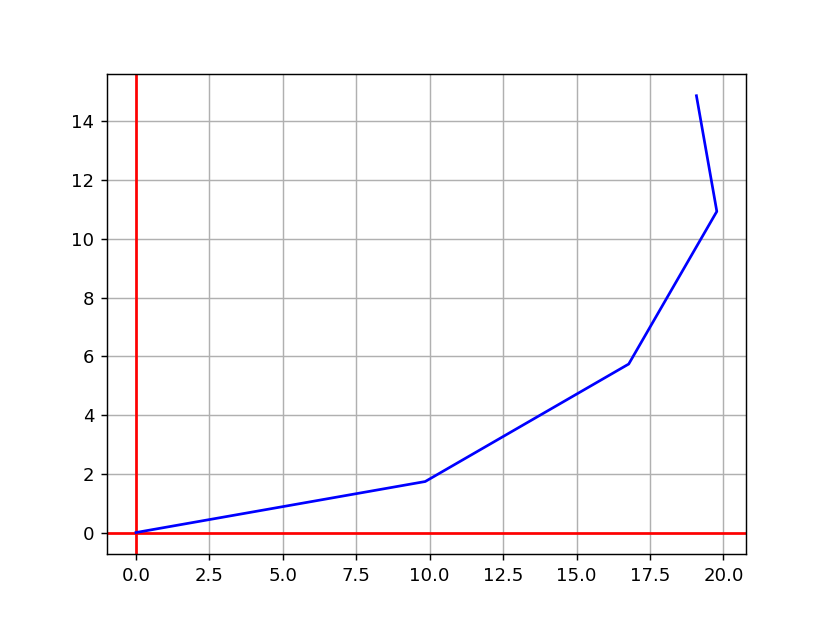

In [7]:
# Set the state vector
q = np.matrix([10, 20, 30, 40]).T * math.pi/180

def plot_fwd_kinematics(q):
    x1, y1, x2, y2, x3, y3, xEE, yEE = forward_kinematics(q)

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.grid(True, which='both')
    ax.axhline(y=0, color='r')
    ax.axvline(x=0, color='r')
    ax.plot([0, x1, x2, x3, xEE] , [0, y1, y2, y3, yEE], 'b')

    plt.show()
    
plot_fwd_kinematics(q)

## Instantaneous Kinematic Model

As mentioned above, it is difficult to work with the Forward Kinematic Model directly because of the presence of non-linear terms. Let us linearize the system by taking time-derivative of the Forward Kinematic Model $\xi_a=f(q_q)$ to get the <b>Instantaneous Direct Kinematic Model</b>

$$\dot{\xi_a} = \frac{\partial f(q_a)}{\partial q_a}\dot{q_a} = J_a(q_a)\dot{q_a}$$

where $J_a= \frac{\partial f}{\partial q}$ is the $m \times n$ Jacobian matrix. 

The Instantaneous Kinematic Model defines a Linear Mapping between the joint-angle velocity vector $\dot{q}$ and the End-Effector velocity vector $\dot{\xi}$, or in other words, the Jacobian $J_a(q_a)$ linearly maps the joint angle velocity space to the end-effector velocity space. The following figure illustrates the mapping.

<img src="./images/mapping.jpg" alt="Mapping" width="600px"/>

## Jacobian

The Jacobian Matrix is defined as

$$
J_a = \left( \begin{array}{cccc}
 \frac{\partial x_{EE}}{\partial \theta_1} & \frac{\partial x_{EE}}{\partial \theta_2} & \frac{\partial x_{EE}}{\partial \theta_3} & \frac{\partial x_{EE}}{\partial \theta_4}\\
 \frac{\partial y_{EE}}{\partial \theta_1} & \frac{\partial y_{EE}}{\partial \theta_2} & \frac{\partial y_{EE}}{\partial \theta_3} & \frac{\partial y_{EE}}{\partial \theta_4}
\end{array} \right)
$$



We observe that 
$$ \frac{\partial x_{EE}}{\partial \theta_1} = -l_1 sin(\theta_1) -l_2 sin(\theta_1 + \theta_2) - l_3 sin(\theta_1+\theta_2+\theta_3) - l_4 sin(\theta_1 + \theta_2 + \theta_3 + \theta_4) = -y_{EE}$$
$$ \frac{\partial x_{EE}}{\partial \theta_2} = -l_2 sin(\theta_1 + \theta_2) - l_3 sin(\theta_1+\theta_2+\theta_3) - l_4 sin(\theta_1 + \theta_2 + \theta_3 + \theta_4) = y_1 -y_{EE}$$
$$ \frac{\partial x_{EE}}{\partial \theta_3} = - l_3 sin(\theta_1+\theta_2+\theta_3) - l_4 sin(\theta_1 + \theta_2 + \theta_3 + \theta_4) = y_2 -y_{EE}$$
$$ \frac{\partial x_{EE}}{\partial \theta_4} = - l_4 sin(\theta_1 + \theta_2 + \theta_3 + \theta_4) = y_3 -y_{EE}$$

And similarly, 
$$ \frac{\partial y_{EE}}{\partial \theta_1} = l_1 cos(\theta_1) + l_2 cos(\theta_1 + \theta_2) + l_3 cos(\theta_1 + \theta_2 + \theta_3) + l_4 cos(\theta_1 + \theta_2 + \theta_3 + \theta_4) = x_{EE}$$
$$ \frac{\partial y_{EE}}{\partial \theta_2} = l_2 cos(\theta_1 + \theta_2) + l_3 cos(\theta_1 + \theta_2 + \theta_3) + l_4 cos(\theta_1 + \theta_2 + \theta_3 + \theta_4) = x_{EE} -x_1$$
$$ \frac{\partial y_{EE}}{\partial \theta_3} = l_3 cos(\theta_1 + \theta_2 + \theta_3) + l_4 cos(\theta_1 + \theta_2 + \theta_3 + \theta_4) = x_{EE} -x_2$$
$$ \frac{\partial y_{EE}}{\partial \theta_4} = l_4 cos(\theta_1 + \theta_2 + \theta_3 + \theta_4) = x_{EE} -x_3$$

Hence the Jacobian Matrix becomes
$$
J_a = \left( \begin{array}{cccc}
 -y_{EE} & y_1 - y_{EE} & y_2 - y_{EE} & y_3-y_{EE}\\
 x_{EE} & x_{EE} - x_1 &  x_{EE} - x_2 & x_{EE} - x_3
\end{array} \right)
$$

In [8]:
def get_jacobian_matrix(q):
    x1, y1, x2, y2, x3, y3, xEE, yEE = forward_kinematics(q)
    J = np.matrix([[-yEE , y1-yEE, y2-yEE, y3-yEE],
                   [xEE, xEE-x1, xEE-x2, xEE-x3]])
    return J

## Inverse Kinematics

In general if we have a linear equation $Ax=b$, where $b \in \mathcal{R}^n$ is given vector and we wish to solve for $x$, we would consider finding the inverse of the Linear mapping, $x = A^{-1}b$

Consider a redundant manipulator ($m < n$), Equation 4.1 then has infinite solutions as the Jacobian has more number of columns than rows. One can formulate this as a constrained optimization problem, where it is desired to find solutions of $\dot{q_a}$ such that (4.1) is satisfied and a quadratic cost function of velocities $g(\dot{q_a}) = \frac{1}{2}\dot{q_a}^T \dot{q_a}$ is minimized. 


Solving the problem using the method of Lagrange Multipliers, we get

$$
\mathcal{L}(\dot{q_a},\lambda)=\frac{1}{2}\dot{q_a}^T \dot{q_a} + \lambda^T (\dot{\xi_a}-J \dot{q_a})
$$

The required solution must satisfy $\frac{\partial\mathcal{L}}{\partial\dot{q_a}}=0$ and $\frac{\partial\mathcal{L}}{\partial\dot{\lambda}}=0$, yielding 

\begin{equation}
\lambda = (J J^T)^{-1}\dot{\xi_a}
\end{equation}

and 

\begin{equation}
\dot{q_a}=J^T(JJ^T)^{-1}\dot{\xi_a}
\end{equation}


 $\dot{q_a} = J^T(JJ^T)^{-1}\dot{\xi_a} = J^{+}\dot{\xi_a}$, where $J^{+}$ is the right pseudo inverse (Moore-Penrose inverse) of the Jacobian Matrix.

In other words, the solution $\dot{q_a}= J^{+}\dot{\xi_a}$ minimizes the norm of the joint angle velocities.

It is also possible to write the cost function in the form
\begin{equation}
g_2(\dot{q_a})=\frac{1}{2}(\dot{q_a}-\dot{q_{a0}})^T(\dot{q_a}-\dot{q_{a0}})
\end{equation}
where $\dot{q_{a0}}$ is a secondary objective we wish to satisfy. Using the above cost function, we fulfil the primary constraint (4.1) and get the solutions as close as possible to $\dot{q_{a0}}$. Solving again by the method of Lagrange multipliers, we get $\lambda = (JJ^T)^{-1}(\dot{\xi_a} - J\dot{q_{a0}})$ and the solution becomes

\begin{equation}
\dot{q_a} = J_{a}^{+}\dot{\xi_a}+(I_n - J_{a}^{+}J_a)\dot{q_{a0}}
\end{equation}


## Pseudo Inverse

The Right Pseudo Inverse (Moore-Penrose inverse) of a Matrix is defined as follows

$$A^{+} = A^T(AA^T)^{-1}$$

But directly computing the inverse as above is not advisable because of numerical instabilities which might come into picture while calculating the inverse of $A^TA$ if the matrix $A$ is ill-conditioned. Instead it is best to use the Sigular Value Decomposition of $A$ to find out the Pseudo-Inverse of $A$.

The Singular Value Decomposition (SVD) of the matrix $A$ is defined as follows
$$A = USV^{T}$$

$A^{+} = (USV^{T})^{T}(USV^T (USV^T)^T)^{-1} =  (VS^TU^T)(USV^T VS^TU^T)^{-1} = VSU^T(US^2U^T)^{-1}=VSU^T US^{-2}U^{-1} = VS^{-1}U^T$

$$A^{+} = V S^{-1}U^{T}$$

In [9]:
def get_pseudo_inverse(J):
    U, S ,V_T = np.linalg.svd(J, full_matrices=False)
    V = np.transpose(V_T)
    S_inv = np.linalg.inv(np.diag(S))
    return V * S_inv * np.transpose(U)

## Null Space Projector
$$P = (I-J^{+}J)$$
$$JP = J(I-J^{+}J) = J - JJ^{+}J = J - J(J^{T}J)^{-1}J^{T}J = 0$$

## Manipulability Measures
The concept of Manipulability was given by Yoshikawa and is detailed in [2]. The ease with which the end-effector of an arm can move arbitrarily in any direction is called its Manipulability. Consider a general case of a manipulator with $n$ degrees of freedom with a $m$ dimensional operational space. If $m < n$ the manipulator will be redundant as it will have more degrees of freedom than are required to perform the task, where $n-m$ are the redundant degrees of freedom. Let us take a general case of $m \leq n$. Generally $m=6$ for a manipulator where orientation of the end-effector is also considered important, else $m=3$ where only position is important.

Consider the set of all end-effector velocities $\dot{\xi_a}$ realisable by joint angle velocities $\dot{q_a}$ at the current configuration $q_a$, such that the Euclidean norm of $\dot{q_a}$ is less than or equal to 1, i.e., $\|\dot{q}\| \leq 1$. This set forms an ellipsoid in the $m$ dimensional Euclidean space of the operational space parameters. The end-effector can move at high speed along the major axis of this ellipsoid and can only move at low speeds along the minor axis of the ellipsoid. Since this ellipsoid gives a measure of the arms ability to move in any arbitrary direction, this is called the manipulability ellipsoid.

We take two important results from [2].

Firstly, the set of realizable operational space velocities $\dot{\xi_a}$ such that $\| \dot{q_a} \| \leq 1$ is an ellipsoid in the $m$ dimensional space containing $\dot{\xi_a}$.

Secondly, let $J_a(q_a)=U_a(q_a)\Sigma_a(q_a){V_a}^T(q_a)$ be the singular value decomposition (SVD) of the analytical Jacobian Matrix $J_a(q_a)$, where $U_a(q_a)=[u_1 \  u_2 \ \ldots \ u_m]$ and $V_a(q_a)$ are orthogonal and $\Sigma_a(q_a)$ is the ordered singular values diagonal matrix with $\sigma_{a1} \geq \sigma_{a2} \geq \ldots \geq \sigma_{am}$. Then the main axes of the manipulability ellipsoid are given by $\sigma_{a1} u_1, \sigma_{a2} u_2, \ldots, \sigma_{am} u_m$.

We define a measure of manipulability $w_1$ as follows

$$w_1 = \sqrt{det(J(q)J(q)^{T})}$$

In [10]:
def get_W1_manipulability(q):
    J = get_jacobian_matrix(q)
    w1 = math.sqrt(np.linalg.det(J * J.T))
    return w1

def get_W1_grad(q):
    inc = 1.0e-7
    J = get_jacobian_matrix(q)
    sqrtJJT = math.sqrt(np.linalg.det(J*J.T))
    qInc = np.matrix([float(q[0]) + inc, float(q[1]), float(q[2]) , float(q[3]) ]).T
    
    JInc = get_jacobian_matrix(qInc)
    delW1_1 =  (math.sqrt(np.linalg.det(JInc*JInc.T)) - sqrtJJT)/inc

    qInc = np.matrix([float(q[0]) , float(q[1]) + inc, float(q[2]) , float(q[3]) ]).T
    JInc = get_jacobian_matrix(qInc)
    delW1_2 =  (math.sqrt(np.linalg.det(JInc*JInc.T)) - sqrtJJT)/inc

    qInc = np.matrix([float(q[0]) , float(q[1]) , float(q[2])+inc , float(q[3]) ]).T
    JInc = get_jacobian_matrix(qInc)
    delW1_3 =  (math.sqrt(np.linalg.det(JInc*JInc.T)) - sqrtJJT)/inc

    qInc = np.matrix([float(q[0]) , float(q[1]) , float(q[2]), float(q[3])+inc ]).T
    JInc = get_jacobian_matrix(qInc)
    delW1_4 =  (math.sqrt(np.linalg.det(JInc*JInc.T)) - sqrtJJT)/inc

    q0 = np.matrix([float(delW1_1),float(delW1_2),float(delW1_3), float(delW1_4)]).T
    #q0 = q0/np.linalg.norm(q0)
    return q0

## Control Law

### Least Sqaure Norm 
The simplest of the control laws takes the direct pseudo-inverse of $J(q)$ and finds out the required control vector $\dot{q_a}$.

$$ \dot{q_a} = J^{+}(q_a)\dot{\xi_a}$$

This law minimizes the joint control norm $\| \dot{q_a} \|$ as is the property of pseudo-inverse .

The law is computationally simple and doesn't require any calculation of partial derivatives. But the simplicity comes at the cost of the possibility of getting unrealisable joint angle velocities and possibility of running into a singularity of the arm.



### Secondary Objective

As mentioned before the redundancy of the mobile manipulator can be exploited to realise a secondary objective along with the primary task of performing a task. Adapting (4.6) for the case of mobile manipulators we can write a generalised control scheme as follows

\begin{equation}
u = \bar{J}^{+}(q)\dot{\xi} + (I_{\nu} - \bar{J}^{+}\bar{J})u_0
\end{equation}

where $\nu = (n+3) - 1 = 5$ and $u_0$ is an arbitrary vector which can be used to fulfil a secondary objective, without violating the non-holonomic constraint. The vector $u_0$ can be chosen as to maximize any scalar function of the configuration such as $w_1(\bar{J})$, $w_2(\bar{J})$ , the velocity transformation ratio $\beta(\bar{J},\hat{i})$ , or the force transformation ratio $\alpha(\bar{J},\hat{i})$. The vector $u_0$ then can be written as 

\begin{equation}
u_0 = k_0 M^T \frac{\partial \mathcal{W}(q)}{\partial q}
\end{equation} 

where $k_0 \in \Re^+$ and $\mathcal{W}$ is a required scalar function of the configuration to be maximized. We compare the measures $w_1(\bar{J})$ and $\beta(\bar{J},\hat{i})$ in chapter 6.  
It is also possible to construct a convex combination of two or more scalar functions to be maximized \cite{bayleIJRR}. For example, a convex combination of measures $w_1$ and $\beta$ can be constructed as follows
\begin{equation}
\mathcal{W}(q) = (\alpha w_1(\bar{J}(q)) + ( 1- \alpha)\beta(\bar{J},\hat{i}))
\end{equation}
where $\alpha \in [0,1]$. Depending upon the value of $\alpha$, the corresponding scalar function will be given more priority. This can be used to combine the qualities of different scalar functions.

In [11]:
timeStep = 1e-3
I = np.identity(4)

In [12]:
def inverse_kinematics(xDot):
    _q1 = np.array(q)
    _q2 = np.array(q)
    
    for t in range(1,200):
        J_1 = get_jacobian_matrix(_q1)
        J_2 = get_jacobian_matrix(_q2)
        
        JPlus_1 = get_pseudo_inverse(J_1)
        JPlus_2 = get_pseudo_inverse(J_2)

        grad = 0.1 * get_W1_grad(_q2)
        qDot_1 = JPlus_1 * xDot
        qDot_2 = JPlus_2 * xDot + (I - JPlus_2*J_2) * grad
        
        _q1 = _q1 + (qDot_1 * t * timeStep)
        _q2 = _q2 + (qDot_2 * t * timeStep)

        x1 ,y1 , x2 , y2 , x3, y3, xEE, yEE = forward_kinematics(_q1)
        if t%10 == 0:
            ax[0].plot([0, x1, x2, x3, xEE] , [0, y1, y2, y3, yEE], 'b')
        
        
        x1 ,y1 , x2 , y2 , x3, y3, xEE, yEE = forward_kinematics(_q2)
        if t%10 == 0:
            ax[1].plot([0, x1, x2, x3, xEE] , [0, y1, y2, y3, yEE], 'b')

<IPython.core.display.Javascript object>


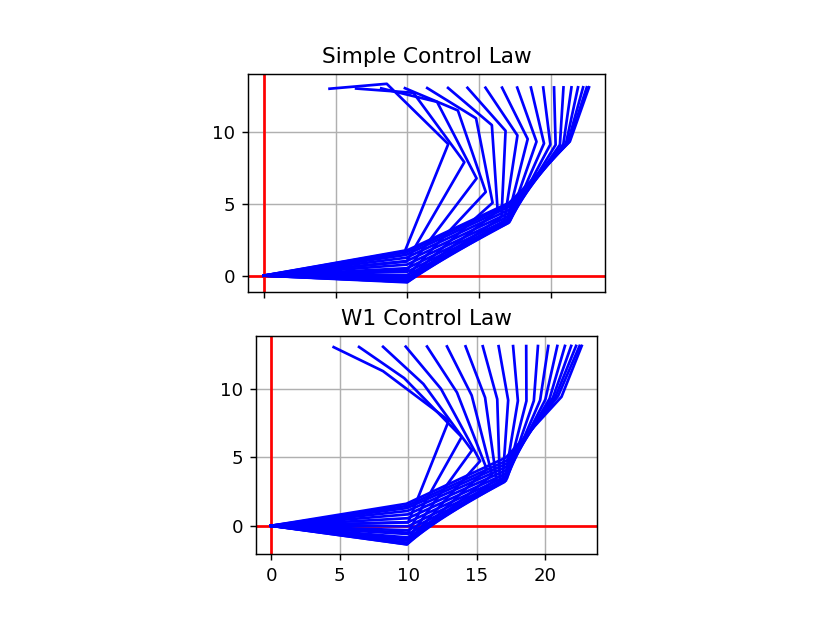

In [13]:
f, ax = plt.subplots(2, sharex=True)

ax[0].set_aspect('equal')
ax[0].set_title('Simple Control Law')
ax[0].grid(True, which='both')
ax[0].axhline(y=0, color='r')
ax[0].axvline(x=0, color='r')

ax[1].set_aspect('equal')
ax[1].set_title('W1 Control Law')
ax[1].grid(True, which='both')
ax[1].axhline(y=0, color='r')
ax[1].axvline(x=0, color='r')

q = np.matrix([10, 15, 20, 25]).T * math.pi/180


xDot = np.matrix([-1, 0.]).T
inverse_kinematics(xDot)

plt.show()

## Internal Motion


<IPython.core.display.Javascript object>


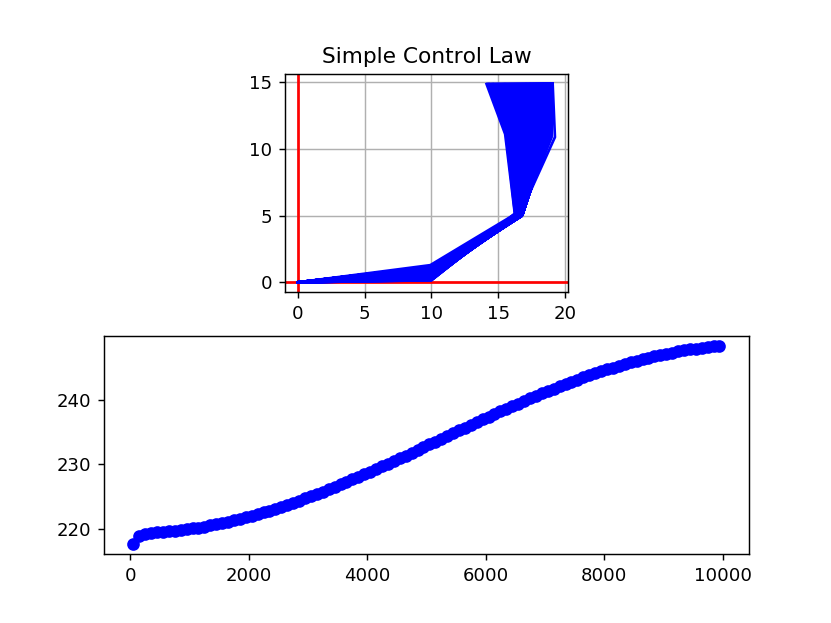

In [15]:
f, ax3 = plt.subplots(2)
ax3[0].set_aspect('equal')
ax3[0].set_title('Simple Control Law')
ax3[0].grid(True, which='both')
ax3[0].axhline(y=0, color='r')
ax3[0].axvline(x=0, color='r')


def inverse_kinematics(xDot):
    _q1 = np.array(q)
    
    for p in range(100):
        J = get_jacobian_matrix(_q1)
        JPlus = get_pseudo_inverse(J)
        
        qDot = JPlus * xDot
        _q1 = _q1 + (qDot * p * timeStep)
    
        for t in range(1,50):
            J_1 = get_jacobian_matrix(_q1)

            JPlus_1 = get_pseudo_inverse(J_1)

            grad = 0.01 * get_W1_grad(_q1)
            qDot_1 =  (I - JPlus_1 * J_1) * grad

            _q1 = _q1 + (qDot_1 * t * timeStep)

            x1 ,y1 , x2 , y2 , x3, y3, xEE, yEE = forward_kinematics(_q1)
            if t%49 == 0:
                ax3[0].plot([0, x1, x2, x3, xEE] , [0, y1, y2, y3, yEE], 'b')
                manipulability = np.sqrt(np.linalg.det(J_1*np.transpose(J_1)))
                #print (qDot_1, manipulability)
                ax3[1].plot(p*100 + t, manipulability ,'bo')
            #ax3[1].plot(t, np.linalg.norm(get_W1_grad(_q1)), 'bo')
        

            
q = np.matrix([10, 20, 30, 40]).T * math.pi/180


xDot = np.matrix([-1, 0.]).T
inverse_kinematics(xDot)

plt.show()

## References
[1]